### XAI (Explainable AI)

모델과 추론의 신뢰성에 대한 답을 찾는 XAI(Explainable Artificial Intelligence, 설명 가능한 인공지능) 분야

 XAI가 어떤 것이며 왜 필요한 것인지  
 참고 영상: https://youtu.be/U43fxbC-4JQ

- Explainable AI  
- CAM: Class Activation Map  
- Grad-CAM  
- ACoL: Adversarial Complementary Learning  
- 생각해 보기

### Class Activation Map

이미지 분류 분야에서  
"모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지" 확인할 수 있는 지도

MIT 연구진의 "Learning Deep Features for Discriminative Localization" 논문에서 확인 가능  
https://arxiv.org/abs/1512.04150

참고 영상: https://youtu.be/fZvOy0VXWAI

#### 1) GAP (Global Average Pooling)

Pooling Layer 에 대한 참고 영상: https://youtu.be/8oOgPUO-TBY

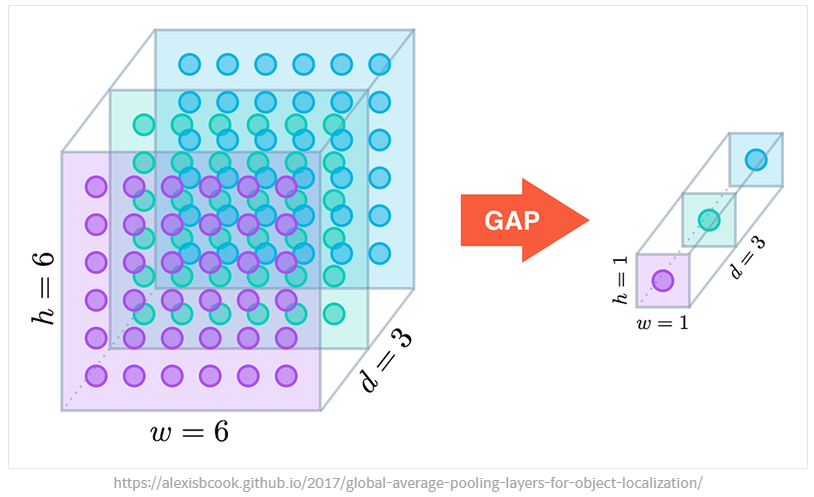

In [1]:
from IPython.display import Image
Image(filename='capture/global_average_pooling.png') 

분류 모델의 마지막 부분에서 fully connected layer 대신 GAP을 사용하는 방법
- Network in Network라는 논문에서 제안됨

아래 그림처럼 GAP 연산을 하고, 그 연산 결과에 소프트맥스 활성화 함수를 적용  
이때 마지막 CNN 레이어의 채널 수는 데이터의 클래스 수에 맞춰 각 클래스에 따른 확률을 얻을 수 있도록 함

Network in Network 논문에서는 
- 이렇게 하면 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어 해석이 쉬울 뿐만 아니라, 
- fully connected layer와 달리 최적화할 파라미터가 존재하지 않으므로
- 과적합(overfitting)을 방지할 수 있다고 설명

#### 2) CAM (Class Activation Map)

클래스가 활성화되는 지도

일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하므로 CNN 레이어를 거친 특성 맵에도 입력값의 위치정보가 유지됨

http://cnnlocalization.csail.mit.edu/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf

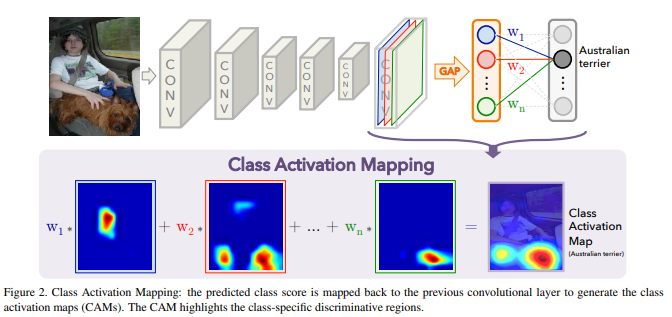

In [2]:
from IPython.display import Image
Image(filename='capture/class_activation_map.png') 

- 먼저 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해서 GAP을 적용
- 그리고 이에 대해서 소프트맥스 레이어(소프트맥스 활성화 함수를 가지고 bias가 없는 fully connected layer)를 적용

- CNN을 거친 특성맵에서 각 클래스에 대한 정보는 결괏값의 여러 채널에 걸쳐 나타나게 됨
- GAP을 통해 각 채널별 정보를 요약하면 
  - 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정
  - 이렇게 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 
  - 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화시키는지 확인할 수 있음
- 이렇게 얻은 특성 맵은 CNN의 출력값 크기와 같게 됨
- 이를 보간(interpolation)을 통해 적절히 원본 이미지 크기로 확대해 주면
- 위와 같은 CAM을 얻을 수 있음

#### 3) Grad-CAM

Grad-CAM(Gradient CAM)은 CAM의 모델의 구조가 제한되는 문제를 해결하고, 다양한 모델의 구조를 해석할 수 있는 방법을 제안함

- Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없음
- 분류 문제 외의 다른 태스크들에 유연하게 대처 할 수 있음

https://arxiv.org/pdf/1610.02391.pdf

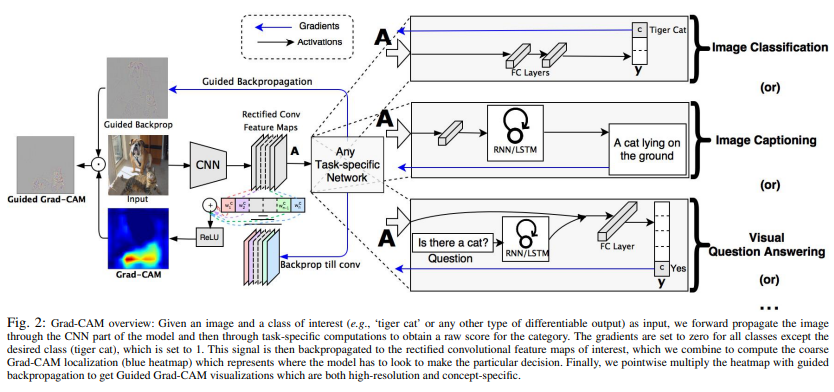

In [4]:
from IPython.display import Image
Image(filename='capture/grad-cam.png') 

이미지를 입력으로 CNN을 거쳐 특성 맵을 추출하고 그 뒤로 태스크에 따라서 다양한 레이어들이 사용
- Image Captioning : 이미지에 대한 설명
- Visual Question Answering : 질문과 이미지가 주어졌을 때, 이에 대한 답변을 내는 태스크

이처럼 다양한 태스크에 사용되는 모델에서도 Grad-CAM 은 사용될 수 있음

Grad-CAM에서는

- 그래디언트(gradient) 를 사용하여 CAM 을 얻어냄
- 원하는 클래스에 대해서 관찰하는 레이어로 들어오는 그래디언트를 구할 수 있다면, 해당 클래스를 활성화할 때, 레이어의 특성 맵에서 어떤 채널이 중요하게 작용하는지 알 수 있음

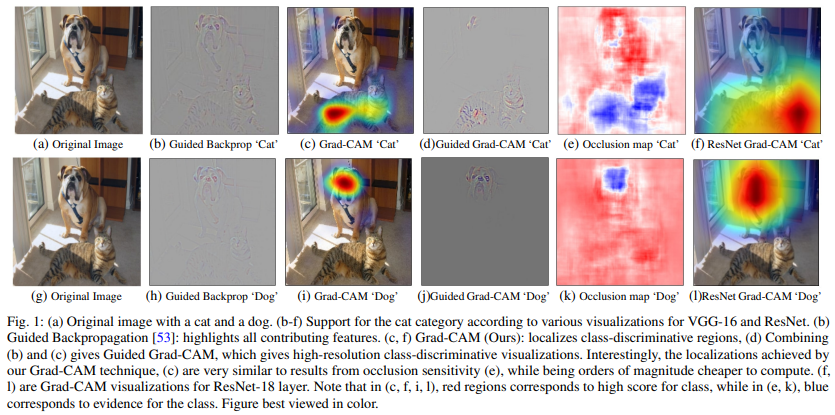

In [5]:
from IPython.display import Image
Image(filename='capture/grad-cam_output.png') 

### ACoL (Adversarial Complementary Learning)

https://openaccess.thecvf.com/content_cvpr_2018/papers/Zhang_Adversarial_Complementary_Learning_CVPR_2018_paper.pdf

- CAM에서 신기한 점은 클래스와 이미지만을 데이터로 학습을 하는데 덤으로 위치 정보까지 얻을 수 있다는 것

약지도학습 (weakly supervised learning)
- 직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식

ACoL은 약지도학습 기법을 활용해 물체 검출(object detection)을 수행할 수 있음

#### 1) 약지도학습 (weakly supervised learning)

약지도학습은 아래 3가지 경우를 포괄적으로 일컫음

- incomplete supervision
  - 학습 데이터 중 일부에만 라벨이 달린 경우
  - 예: 10000장 이미지 중 500개에만 라벨이 있는 경우
  - 준지도학습과 같은 경우
- inexact supervsion
  - 학습 데이터의 라벨이 충분히 정확하게 달려있지 않은 경우
  - 예: 개인지 고양이인지 정보만 label만 달려있는 데이터에서 object detection 또는 semantic segmentation 을 하려는 경우
- inaccurate supervision
  - 학습 데이터에 noise 가 있는 경우
  - 예: label 이 잘못 달려있는 경우

Grad-CAM 을 이용해서 특징이 두드러지는 영역을 알 수 있고, 이를 이용해서 object detection 이나 semantic segmentation 을 할 수 있다.

아래 그림은 Grad-CAM 을 이용해서 Semantic Segmentation 을 한 결과다.

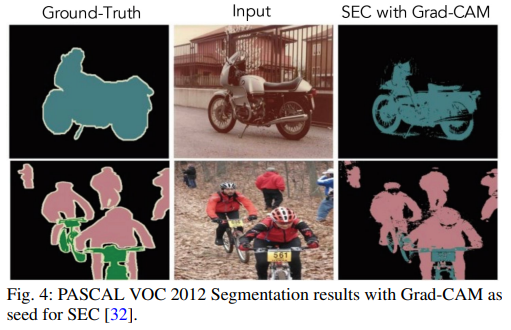

In [6]:
from IPython.display import Image
Image(filename='capture/segmentation_results_with_grad-cam.png') 

#### 2) ACoL (Adversarial Complementary Learning)

https://openaccess.thecvf.com/content_cvpr_2018/papers/Zhang_Adversarial_Complementary_Learning_CVPR_2018_paper.pdf

CAM, Grad-CAM 은
- 특징이 주로 나타나는 위치에 중점적으로 활성화되는 것을 알 수 있음
- 가장자리는 약하게 알 수 있음

ACoL 은
- CAM 모델이 특정 부위에 집중해 학습하는 것을 막기 위해, 브랜치를 2가지로 두어 너무 높은 점수를 지워줌
- 주변의 특성 또한 반영할 수 있게 함
- 이 과정을 Adversarial, 즉 적대적인 학습방법이라고 함

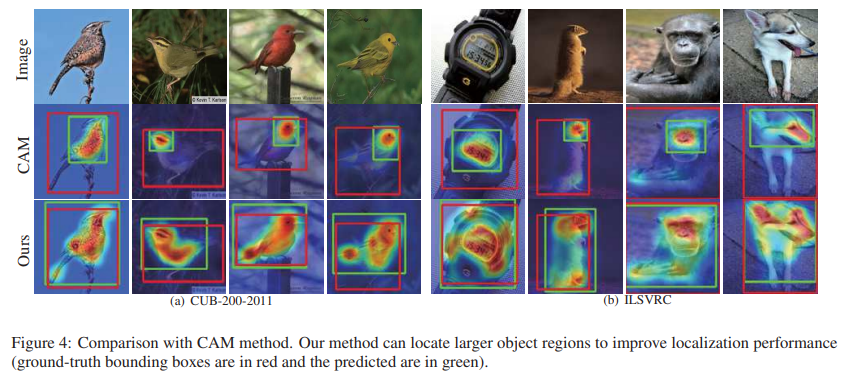

In [7]:
from IPython.display import Image
Image(filename='capture/acol-comparison.png') 